In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Load datasets from 
goalies_df = pd.read_csv("resources/boston/goalies-bruins-0809.csv")
teams_df = pd.read_csv("resources/boston/teams-bruins-0809.csv")
lines_df = pd.read_csv("resources/boston/teams-bruins-0809.csv")
skaters_df = pd.read_csv("resources/boston/teams-bruins-0809.csv")

In [7]:
goalies_df.head()

,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
0,8470140,2008,Kari Lehtonen,ATL,G,other,46,5232.0,11.45,12.0,...,15.0,2.67,2.89,5.89,7.0,1.0,4.0,22.0,0.0,0.0
1,8470140,2008,Kari Lehtonen,ATL,G,all,46,157455.0,129.82,134.0,...,110.0,46.02,43.49,40.30,42.0,41.0,51.0,605.0,6.0,3.0
2,8470140,2008,Kari Lehtonen,ATL,G,5on5,46,116930.0,80.79,80.0,...,54.0,35.26,29.92,15.61,26.0,34.0,20.0,434.0,6.0,3.0
3,8470140,2008,Kari Lehtonen,ATL,G,4on5,46,17502.0,31.77,36.0,...,35.0,6.22,8.57,16.99,7.0,3.0,26.0,137.0,0.0,0.0
4,8470140,2008,Kari Lehtonen,ATL,G,5on4,46,17791.0,4.94,6.0,...,6.0,1.33,1.78,1.82,2.0,3.0,1.0,10.0,0.0,0.0


In [13]:
# Get all of the Goalies for Boston
goalies_df[(goalies_df["team"] == "BOS") & (goalies_df["situation"] == "all")]


,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
106,8458988,2008,Manny Fernandez,BOS,G,all,28,98644.0,73.72,71.0,...,72.0,23.15,25.07,25.50,23.0,23.0,25.0,295.0,2.0,1.0
111,8471695,2008,Tuukka Rask,BOS,G,all,1,3598.0,1.76,0.0,...,2.0,0.93,0.34,0.49,0.0,0.0,0.0,11.0,0.0,0.0
236,8460703,2008,Tim Thomas,BOS,G,all,53,191840.0,137.13,112.0,...,121.0,47.01,47.37,42.75,33.0,45.0,34.0,741.0,6.0,3.0


In [34]:
# Get all of the goalie batteries for every team in the Bruins division in '08 - '09
# 
# BOS Bruins, MON Canadiens, BUF Sabres, OTT Senators, TOR Maple Leafs
#

ne_division = ["BOS", "MTL", "BUF", "OTT", "TOR"]

ne_goalies_df = goalies_df[(goalies_df["team"].isin(ne_division)) &
                           (goalies_df["situation"] == "all")]

ne_goalies_df = ne_goalies_df.sort_values(by="team", ascending=True)

ne_goalies_df

,playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,...,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
106,8458988,2008,Manny Fernandez,BOS,G,all,28,98644.0,73.72,71.0,...,72.0,23.15,25.07,25.50,23.0,23.0,25.0,295.0,2.0,1.0
111,8471695,2008,Tuukka Rask,BOS,G,all,1,3598.0,1.76,0.0,...,2.0,0.93,0.34,0.49,0.0,0.0,0.0,11.0,0.0,0.0
236,8460703,2008,Tim Thomas,BOS,G,all,53,191840.0,137.13,112.0,...,121.0,47.01,47.37,42.75,33.0,45.0,34.0,741.0,6.0,3.0
56,8468550,2008,Mikael Tellqvist,BUF,G,all,21,60449.0,45.21,47.0,...,32.0,17.70,14.48,13.03,13.0,19.0,15.0,222.0,0.0,0.0
261,8459579,2008,Patrick Lalime,BUF,G,all,24,77802.0,55.35,67.0,...,45.0,21.34,17.30,16.72,25.0,21.0,21.0,285.0,0.0,0.0
276,8468011,2008,Ryan Miller,BUF,G,all,59,202395.0,139.72,145.0,...,105.0,53.23,51.77,34.72,58.0,49.0,38.0,749.0,4.0,2.0
401,8471679,2008,Carey Price,MTL,G,all,52,180336.0,135.94,143.0,...,137.0,45.83,45.34,44.77,44.0,45.0,54.0,763.0,4.0,2.0
431,8470860,2008,Jaroslav Halak,MTL,G,all,34,115848.0,101.02,92.0,...,100.0,32.93,32.64,35.44,28.0,32.0,32.0,547.0,0.0,0.0
436,8462055,2008,Marc Denis,MTL,G,all,1,1200.0,0.57,1.0,...,0.0,0.21,0.35,0.00,1.0,0.0,0.0,0.0,0.0,0.0
206,8470880,2008,Brian Elliott,OTT,G,all,31,100022.0,68.85,77.0,...,64.0,24.18,21.67,23.01,29.0,27.0,21.0,370.0,0.0,0.0


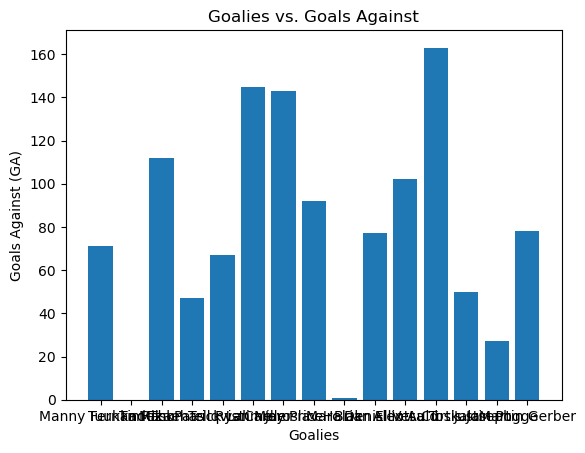

In [35]:
# Plot the goalies in groups per their team
plt.bar(ne_goalies_df["name"], ne_goalies_df["goals"])

plt.xlabel("Goalies")
plt.ylabel("Goals Against (GA)")
plt.title("Goalies vs. Goals Against")

plt.show()

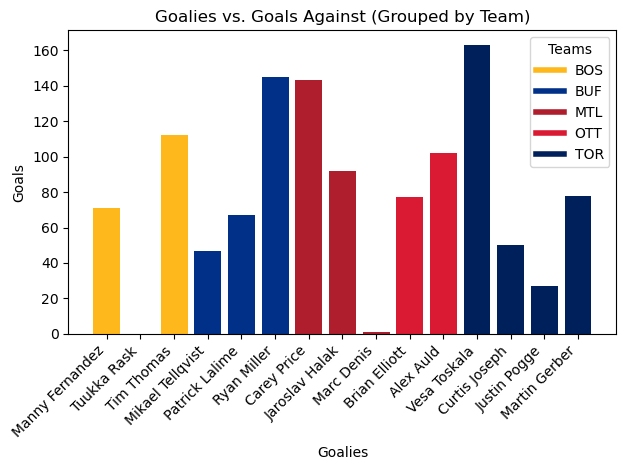

In [36]:
# Make the graph more pretty by adding color and groupings

# Assign a unique color to each team
teams = ne_goalies_df["team"].unique()
team_colors = {team: f"C{i}" for i, team in enumerate(teams)} # somehow this uses default matlab colors
custom_team_colors = {
    "BOS": "#FFB81C",
    "BUF": "#003087",
    "MTL": "#AF1E2D",
    "OTT": "#DA1A32",
    "TOR": "#00205B"
}

# Map each goalie to their team color
colors = ne_goalies_df["team"].map(custom_team_colors)

# Create bar plot
plt.bar(ne_goalies_df["name"], ne_goalies_df["goals"], color=colors)

# Add labels
plt.xlabel("Goalies")
plt.ylabel("Goals")
plt.title("Goalies vs. Goals Against (Grouped by Team)")

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in custom_team_colors.values()]
plt.legend(handles, custom_team_colors.keys(), title="Teams", loc="upper right")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()